## Model Training Notebook
This notebook orchestrates model training using the project’s modular Python scripts:
- `config/config.py` for run configuration
- `data/data_loader.py` for loading and splitting data
- `preprocessing/` modules for cleaning, encoding, and scaling
- `balancing/balancer.py` for handling class imbalance
- `models/model_factory.py` for building candidate models
- `training/trainer.py` for training loops and evaluation
- `utils/metrics.py` for reporting and metrics

Use the cells below to wire these pieces together and run experiments.

In [1]:
import sys
from pathlib import Path

# Add project root (DE_project_S5) to sys.path
PROJECT_ROOT = Path().resolve().parent
sys.path.append(str(PROJECT_ROOT))

print("Project root added:", PROJECT_ROOT)

import pandas as pd
import numpy as np

Project root added: E:\DE_Project_S5


In [9]:
# Data
from maintenance_ml.data.data_loader import load_data

# Pipeline
from maintenance_ml.pipeline.build_pipeline import run_pipeline

# Model
from maintenance_ml.models.model_factory import get_model

# Training
from maintenance_ml.training.trainer import train_model, evaluate_model

# Confussion Matrix
from maintenance_ml.utils.metrices import plot_confusion_matrix\

# Model I/O
from maintenance_ml.utils.model_io import save_model

In [3]:
# Load data
DATA_PATH = PROJECT_ROOT / "data" / "Predictive_Maintenance_dataset.csv"

df = load_data(DATA_PATH)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Vibration Levels,Operational Hours,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,42.0,20.0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,52.0,21.0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,44.0,18.0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,52.0,10.0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,44.0,10.0,No Failure


## Data Preprocessing Pipeline
Run the complete preprocessing pipeline to prepare data for model training:
- Clean and handle missing values
- Encode categorical features
- Scale numerical features
- Balance class distribution using SMOTE
- Split into train/test sets

In [4]:
X_train, X_test, y_train, y_test = run_pipeline(df)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Encoding columns: ['Type']
Train shape: (748, 9)
Test shape: (100, 9)


## Logistic Regression Model
Train and evaluate a Logistic Regression classifier as the baseline model.

In [ ]:
model = get_model("logistic")
model = train_model(model, X_train, y_train)

results = evaluate_model(model, X_test, y_test)
print(results["report"])

              precision    recall  f1-score   support

           0       0.93      0.70      0.80        93
           1       0.07      0.29      0.11         7

    accuracy                           0.67       100
   macro avg       0.50      0.49      0.45       100
weighted avg       0.87      0.67      0.75       100

Confusion Matrix:
 [[65 28]
 [ 5  2]]


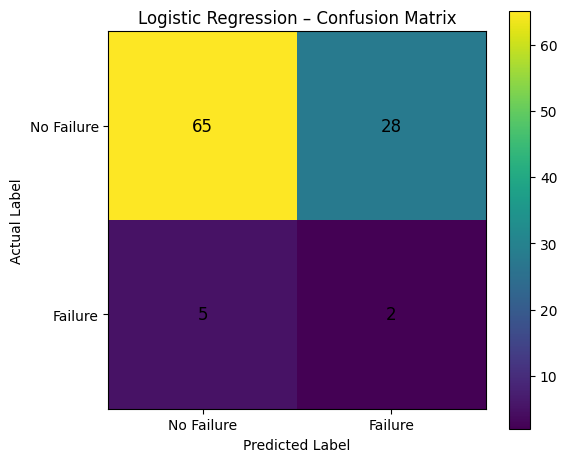

In [8]:
cm = results["confusion_matrix"]

plot_confusion_matrix(
    cm,
    title="Logistic Regression – Confusion Matrix"
)

In [11]:
model_path = save_model(
    model,
    model_name="logistic_regression_failure_prediction"
)
print("Model saved at:", model_path)

Model saved at: artifacts\logistic_regression_failure_prediction.joblib
Model saved at: artifacts\logistic_regression_failure_prediction.joblib


## Decision Tree Model
Train and evaluate a Decision Tree classifier for failure prediction.

In [12]:
model = get_model("decision_tree")
model = train_model(model, X_train, y_train)

results = evaluate_model(model, X_test, y_test)
print(results["report"])

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        93
           1       0.30      0.43      0.35         7

    accuracy                           0.89       100
   macro avg       0.63      0.68      0.65       100
weighted avg       0.91      0.89      0.90       100



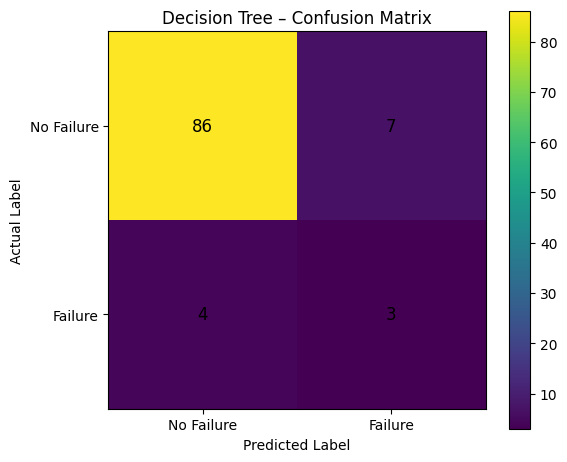

In [13]:
cm = results["confusion_matrix"]

plot_confusion_matrix(
    cm,
    title="Decision Tree – Confusion Matrix"
)

In [14]:
model_path = save_model(
    model,
    model_name="decision_tree_failure_prediction"
)
print("Model saved at:", model_path)

Model saved at: artifacts\decision_tree_failure_prediction.joblib
Model saved at: artifacts\decision_tree_failure_prediction.joblib


## Support Vector Machine (SVM) Model
Train and evaluate an SVM classifier for failure prediction.

In [15]:
model = get_model("svm")
model = train_model(model, X_train, y_train)

results = evaluate_model(model, X_test, y_test)
print(results["report"])

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        93
           1       0.10      0.29      0.15         7

    accuracy                           0.77       100
   macro avg       0.52      0.55      0.51       100
weighted avg       0.88      0.77      0.82       100



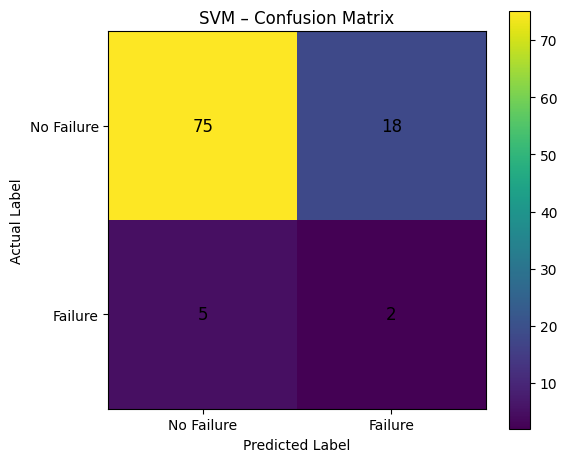

In [16]:
cm = results["confusion_matrix"]

plot_confusion_matrix(
    cm,
    title="SVM – Confusion Matrix"
)

In [17]:
model_path = save_model(
    model,
    model_name="decision_tree_failure_prediction"
)
print("Model saved at:", model_path)

Model saved at: artifacts\decision_tree_failure_prediction.joblib
Model saved at: artifacts\decision_tree_failure_prediction.joblib
